In [1]:
from tree import Mbtree
import matplotlib.pyplot as plt

def draw_subtree(self, centernode=None, size=0.25, lw=0.8, maxdepth=2):
    if centernode is None:
        centernode = self.root
    self.calc_node_height(maxdepth)
    width = 5 * (maxdepth + 1)
    height = centernode.height
    parent = centernode.parent
    if parent is not None:
        height += (len(parent.children) - 1) * 4
        parent.height = height
    fig, ax = plt.subplots(figsize=(width * size, height * size))
    ax.set_xlim(0, width)
    ax.set_ylim(0, height)   
    ax.invert_yaxis()
    ax.axis("off")        
    
    nodelist = [centernode]
    depth = centernode.depth
    while len(nodelist) > 0 and depth <= maxdepth:        
        dy = 0
        if parent is not None:
            dy = parent.children.index(centernode) * 4
        childnodelist = []
        for node in nodelist:
            if node is None:
                dy += 4
                childnodelist.append(None)
            else:
                dx = 5 * node.depth
                node.draw_node(ax=ax, maxdepth=maxdepth, size=size, lw=lw, dx=dx, dy=dy)
                dy += node.height
                if len(node.children) > 0:  
                    childnodelist += node.children
                else:
                    childnodelist.append(None)
        depth += 1
        nodelist = childnodelist
        
    if parent is not None:
        dy = 0
        for sibling in parent.children:
            if sibling is not centernode:
                sibling.height = 4
                dx = 5 * sibling.depth
                sibling.draw_node(ax, maxdepth=sibling.depth, size=size, lw=lw, dx=dx, dy=dy)
            dy += sibling.height
        dx = 5 * parent.depth
        parent.draw_node(ax, maxdepth=maxdepth, size=size, lw=lw, dx=dx, dy=0)
    
        node = parent
        while node.parent is not None:
            node = node.parent
            node.height = height
            dx = 5 * node.depth
            node.draw_node(ax, maxdepth=node.depth, size=size, lw=lw, dx=dx, dy=0)
            
Mbtree.draw_subtree = draw_subtree

     9 depth 1 node created
    72 depth 2 node created
   504 depth 3 node created
  3024 depth 4 node created
 15120 depth 5 node created
 54720 depth 6 node created
148176 depth 7 node created
200448 depth 8 node created
127872 depth 9 node created
     0 depth 10 node created
total node num = 549946


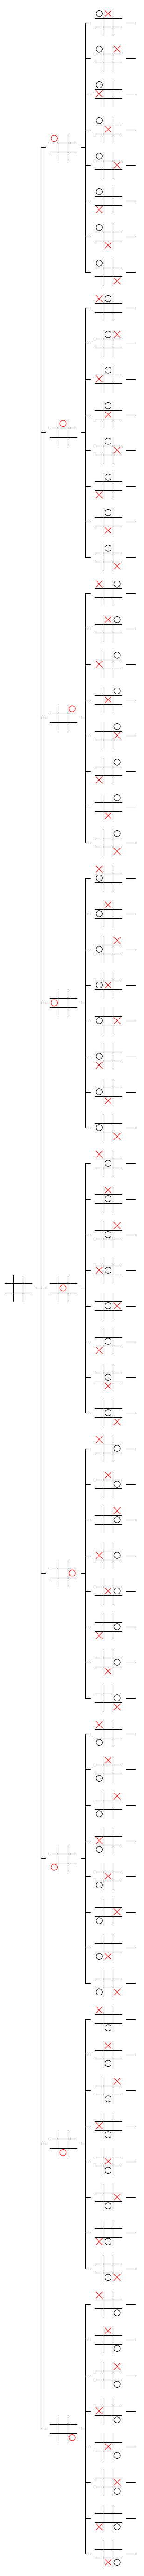

In [2]:
mbtree = Mbtree()
mbtree.draw_subtree(mbtree.root, maxdepth=2)

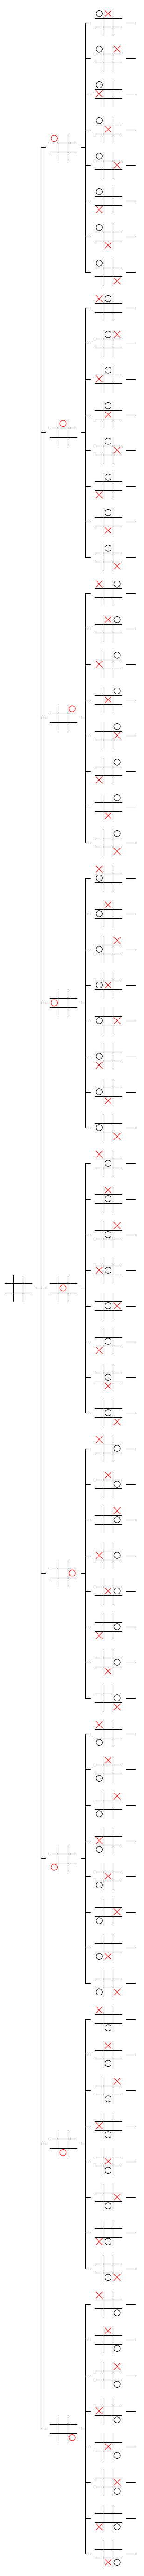

In [3]:
mbtree.draw_subtree()

In [4]:
from gui import GUI

class Mbtree_GUI(GUI):
    def __init__(self, mbtree, size=1):
        self.mbtree = mbtree
        self.size = size
        super().__init__()
        
    def create_widgets(self):
        pass
    
    def create_event_handler(self):
        pass
    
    def display_widgets(self):
        pass

    def update_gui(self):
        pass

    def update_widgets_status(self):
        pass

In [5]:
def create_widgets(self):
    self.left_button = self.create_button("←", 100)
    self.up_button = self.create_button("↑", 100)
    self.right_button = self.create_button("→", 100)
    self.botton_button = self.create_button("↓", 100)

Mbtree_GUI.create_widgets = create_widgets

In [6]:
class Mbtree_GUI(GUI):
    def __init__(self, mbtree, size=1):
        self.mbtree = mbtree
        self.size = size
        self.width = 50
        self.height = 64
        super().__init__()
        
    def create_widgets(self):
        self.left_button = self.create_button("←", 100)
        self.up_button = self.create_button("↑", 100)
        self.right_button = self.create_button("→", 100)
        self.botton_button = self.create_button("↓", 100)    
    
    def create_event_handler(self):
        pass
    
    def display_widgets(self):
        pass

    def update_gui(self):
        pass

    def update_widgets_status(self):
        pass

In [7]:
def create_widgets(self):
    self.left_button = self.create_button("←", 100)
    self.up_button = self.create_button("↑", 100)
    self.right_button = self.create_button("→", 100)
    self.down_button = self.create_button("↓", 100)
    
    with plt.ioff():
        self.fig, self.ax = plt.subplots(figsize=[self.width * self.size,
                                                  self.height * self.size])
    self.fig.canvas.toolbar_visible = False
    self.fig.canvas.header_visible = False
    self.fig.canvas.footer_visible = False
    self.fig.canvas.resizable = False       
    
Mbtree_GUI.create_widgets = create_widgets

In [8]:
import ipywidgets as widgets

def display_widgets(self):
    hbox = widgets.HBox([self.left_button, self.right_button, self.up_button, self.down_button])
    display(widgets.VBox([hbox, self.fig.canvas]))    
    
Mbtree_GUI.display_widgets = display_widgets

In [9]:
mbtree_gui = Mbtree_GUI(mbtree)

In [10]:
mbtree_gui = Mbtree_GUI(mbtree, size=0.15)

In [11]:
def draw_subtree(self, centernode=None, ax=None, size=0.25, lw=0.8, maxdepth=2):
    if centernode is None:
        centernode = self.root
    self.calc_node_height(maxdepth)
    width = 5 * (maxdepth + 1)
    height = centernode.height
    parent = centernode.parent
    if parent is not None:
        height += (len(parent.children) - 1) * 4
        parent.height = height
    if ax is None:
        fig, ax = plt.subplots(figsize=(width * size, height * size))
        ax.set_xlim(0, width)
        ax.set_ylim(0, height)   
        ax.invert_yaxis()
        ax.axis("off")        
    
    nodelist = [centernode]
    depth = centernode.depth
    while len(nodelist) > 0 and depth <= maxdepth:        
        dy = 0
        if parent is not None:
            dy = parent.children.index(centernode) * 4
        childnodelist = []
        for node in nodelist:
            if node is None:
                dy += 4
                childnodelist.append(None)
            else:
                dx = 5 * node.depth
                node.draw_node(ax=ax, maxdepth=maxdepth, size=size, lw=lw, dx=dx, dy=dy)
                dy += node.height
                if len(node.children) > 0:  
                    childnodelist += node.children
                else:
                    childnodelist.append(None)
        depth += 1
        nodelist = childnodelist
        
    if parent is not None:
        dy = 0
        for sibling in parent.children:
            if sibling is not centernode:
                sibling.height = 4
                dx = 5 * sibling.depth
                sibling.draw_node(ax, maxdepth=sibling.depth, size=size, lw=lw, dx=dx, dy=dy)
            dy += sibling.height
        dx = 5 * parent.depth
        parent.draw_node(ax, maxdepth=maxdepth, size=size, lw=lw, dx=dx, dy=0)
    
        node = parent
        while node.parent is not None:
            node = node.parent
            node.height = height
            dx = 5 * node.depth
            node.draw_node(ax, maxdepth=node.depth, size=size, lw=lw, dx=dx, dy=0)
            
Mbtree.draw_subtree = draw_subtree

In [12]:
def update_gui(self):
    self.ax.clear()
    self.ax.set_xlim(0, self.width)
    self.ax.set_ylim(0, self.height)   
    self.ax.invert_yaxis()
    self.ax.axis("off")   
    self.mbtree.draw_subtree(self.mbtree.root, ax=self.ax, maxdepth=1)
    
Mbtree_GUI.update_gui = update_gui

In [13]:
mbtree_gui = Mbtree_GUI(mbtree, size=0.15)

In [14]:
def __init__(self):
    # %matplotlib widget のマジックコマンドを実行する
    get_ipython().run_line_magic('matplotlib', 'widget')
    
    self.disable_shortcutkeys()
    self.create_widgets()
    self.create_event_handler()
    self.display_widgets() 
    self.update_gui()
    
GUI.__init__ = __init__

In [15]:
mbtree_gui = Mbtree_GUI(mbtree, size=0.15)

In [16]:
def update_gui(self):
    self.fig.set_facecolor("lightgray")
    self.ax.clear()
    self.ax.set_xlim(0, self.width)
    self.ax.set_ylim(0, self.height)   
    self.ax.invert_yaxis()
#   self.ax.axis("off")   
    self.mbtree.draw_subtree(self.mbtree.root, ax=self.ax, maxdepth=1)
    
Mbtree_GUI.update_gui = update_gui

In [17]:
mbtree_gui = Mbtree_GUI(mbtree, size=0.15)

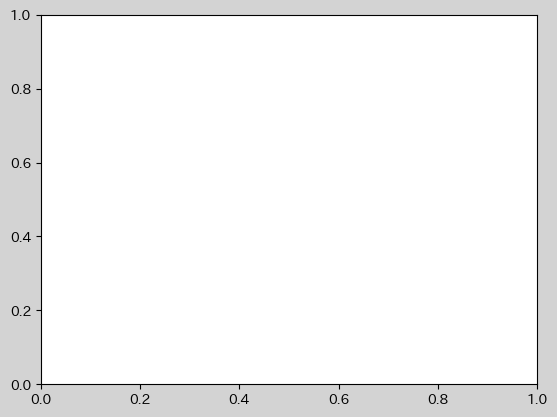

In [18]:
%matplotlib inline
plt.close("all")
fig, ax = plt.subplots(facecolor="lightgray")

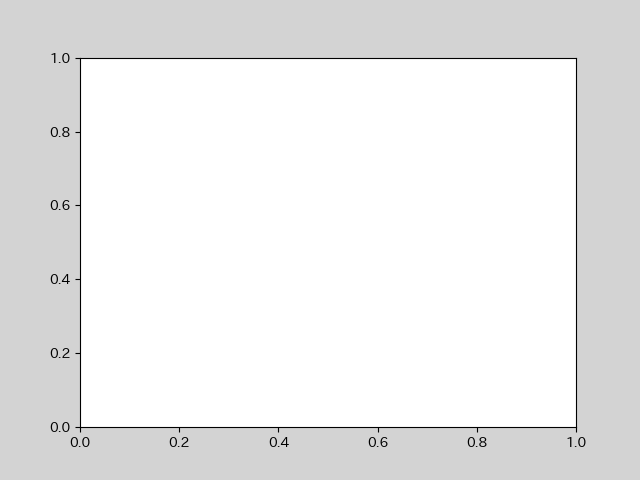

In [19]:
%matplotlib widget
fig, ax = plt.subplots(facecolor="lightgray")

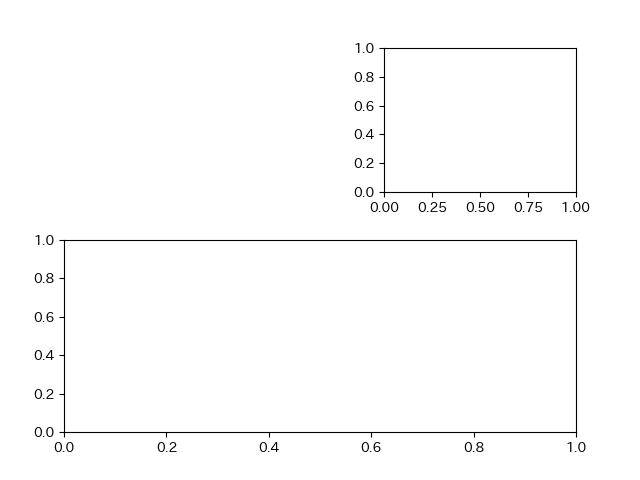

In [20]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.1, 0.8, 0.4]) # 左下が (0.1, 0.1)、幅が 0.8、高さが 0.4 の Axes
ax2 = fig.add_axes([0.6, 0.6, 0.3, 0.3]) # 左下が (0.6, 0.3)、幅が 0.3、高さが 0.3 の Axes

In [21]:
def create_widgets(self):
    self.left_button = self.create_button("←", 100)
    self.up_button = self.create_button("↑", 100)
    self.right_button = self.create_button("→", 100)
    self.down_button = self.create_button("↓", 100)
    
    with plt.ioff():
        self.fig = plt.figure(figsize=[self.width * self.size,
                                       self.height * self.size])
        self.ax = self.fig.add_axes([0, 0, 1, 1])   
    self.fig.canvas.toolbar_visible = False
    self.fig.canvas.header_visible = False
    self.fig.canvas.footer_visible = False
    self.fig.canvas.resizable = False       
    
Mbtree_GUI.create_widgets = create_widgets

In [22]:
def update_gui(self):
    self.ax.clear()
    self.ax.set_xlim(0, self.width)
    self.ax.set_ylim(0, self.height)   
    self.ax.invert_yaxis()
    self.ax.axis("off")   

    self.mbtree.draw_subtree(self.mbtree.root, ax=self.ax, maxdepth=1)
    
Mbtree_GUI.update_gui = update_gui

In [23]:
mbtree_gui = Mbtree_GUI(mbtree, size=0.15)

In [24]:
class Mbtree_GUI(GUI):
    def __init__(self, mbtree, size=0.15):
        self.mbtree = mbtree
        self.size = size
        self.width = 50
        self.height = 64
        self.centernode = self.mbtree.root
        super().__init__()
        
    def create_widgets(self):
        self.left_button = self.create_button("←", 100)
        self.up_button = self.create_button("↑", 100)
        self.right_button = self.create_button("→", 100)
        self.down_button = self.create_button("↓", 100)
        
        with plt.ioff():
            self.fig = plt.figure(figsize=[self.width * self.size,
                                           self.height * self.size])
            self.ax = self.fig.add_axes([0, 0, 1, 1])
        self.fig.canvas.toolbar_visible = False
        self.fig.canvas.header_visible = False
        self.fig.canvas.footer_visible = False
        self.fig.canvas.resizable = False       
        
    def create_event_handler(self):
        pass
    
    def display_widgets(self):
        hbox = widgets.HBox([self.left_button, self.right_button, self.up_button, self.down_button])
        display(widgets.VBox([hbox, self.fig.canvas]))  

    def update_gui(self):
        self.ax.clear()
        self.ax.set_xlim(0, self.width)
        self.ax.set_ylim(0, self.height)   
        self.ax.invert_yaxis()
        self.ax.axis("off")   
        
        maxdepth = min(self.centernode.depth + 1, 9)
        self.mbtree.draw_subtree(self.centernode, ax=self.ax, maxdepth=maxdepth)

    def update_widgets_status(self):
        pass

In [25]:
mbtree_gui = Mbtree_GUI(mbtree)

In [26]:
def create_event_handler(self):
    def on_left_button_clicked(b=None):
        if self.centernode.parent is not None:
            self.centernode = self.centernode.parent
            self.update_gui()
            
    def on_right_button_clicked(b=None):
        if len(self.centernode.children) > 0:
            self.centernode = self.centernode.children[0]
            self.update_gui()
            
    self.left_button.on_click(on_left_button_clicked)
    self.right_button.on_click(on_right_button_clicked)

    def on_key_press(event):
        keymap = {
            "left": on_left_button_clicked,
            "right": on_right_button_clicked,
        }
        if event.key in keymap:
            keymap[event.key]()
            
    # fig の画像イベントハンドラを結び付ける
    self.fig.canvas.mpl_connect("key_press_event", on_key_press)        

Mbtree_GUI.create_event_handler = create_event_handler

In [27]:
mbtree_gui = Mbtree_GUI(mbtree)

In [28]:
def create_event_handler(self):
    def on_left_button_clicked(b=None):
        if self.centernode.parent is not None:
            self.centernode = self.centernode.parent
            self.update_gui()
            
    def on_right_button_clicked(b=None):
        if len(self.centernode.children) > 0:
            self.centernode = self.centernode.children[0]
            self.update_gui()

    def on_up_button_clicked(b=None):
        if self.centernode.parent is not None:
            index = self.centernode.parent.children.index(self.centernode)
            if index > 0:
                self.centernode = self.centernode.parent.children[index - 1]
                self.update_gui()
            
    def on_down_button_clicked(b=None):
        if self.centernode.parent is not None:
            index = self.centernode.parent.children.index(self.centernode)
            if self.centernode.parent.children[-1] is not self.centernode:
                self.centernode = self.centernode.parent.children[index + 1]
                self.update_gui()            
            
    self.left_button.on_click(on_left_button_clicked)
    self.right_button.on_click(on_right_button_clicked)
    self.up_button.on_click(on_up_button_clicked)
    self.down_button.on_click(on_down_button_clicked)

    def on_key_press(event):
        keymap = {
            "left": on_left_button_clicked,
            "right": on_right_button_clicked,
            "up": on_up_button_clicked,
            "down": on_down_button_clicked,
        }
        if event.key in keymap:
            keymap[event.key]()
            
    # fig の画像イベントハンドラを結び付ける
    self.fig.canvas.mpl_connect("key_press_event", on_key_press)        

Mbtree_GUI.create_event_handler = create_event_handler

In [29]:
mbtree_gui = Mbtree_GUI(mbtree)